In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from inspect_util import Chunk

In [2]:
df = pd.read_csv('data/partial_order_result.csv')
print(f'Total number of chunks: {len(df)}')
df.head()

Total number of chunks: 13573


,chunk_id,partial_order,chunk_size,resolution_size
0,776662,True,25,12
1,776782,True,121,101
2,776793,True,13,5
3,776828,True,12,3
4,776863,True,13,5


In [3]:
malformed_chunks = pd.read_csv('data/malformed_chunks.csv')
malformed_chunks = malformed_chunks['chunk_id'].unique()
print(f'Removing {len(malformed_chunks)} malformed chunks')
df = df[~df['chunk_id'].isin(malformed_chunks)]
print(f'Total number of chunks: {len(df)}')

Removing 264 malformed chunks
Total number of chunks: 13309


### In how many chunks the resolution could not be isolated from the context?

In [4]:
imprecise = df[df['partial_order'] == 'manual']
print(f'In {len(imprecise)} ({(len(imprecise)/len(df))*100:.2f}%) of {len(df)} chunks the resolution could not be isolated from the context')
df = df[df['partial_order'] != 'manual']
print(f'Total number of valid chunks: {len(df)}')

In 2583 (19.41%) of 13309 chunks the resolution could not be isolated from the context
Total number of valid chunks: 10726


### What is the percentage of chunks that violates the partial order in the resolution?

In [5]:
violates_partial_order = df[df['partial_order'] == 'False']
does_not_violate = df[df['partial_order'] == 'True']
print(f'{len(violates_partial_order)} ({(len(violates_partial_order)/len(df))*100:.2f}%) of {len(df)} chunks violate the partial order')

142 (1.32%) of 10726 chunks violate the partial order


### Characteristics of chunks where the resolution violates the partial order

In [6]:
violates_partial_order[['chunk_size','resolution_size']].describe().round(2)

,chunk_size,resolution_size
count,142.00,142.00
mean,187.14,104.88
std,448.21,238.30
min,10.00,2.00
25%,16.00,7.00
50%,27.00,12.00
75%,65.50,46.00
max,2923.00,1557.00


<AxesSubplot:>

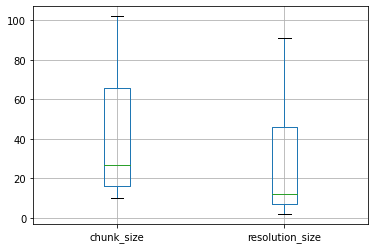

In [7]:
violates_partial_order[['chunk_size', 'resolution_size']].boxplot(showfliers=False)

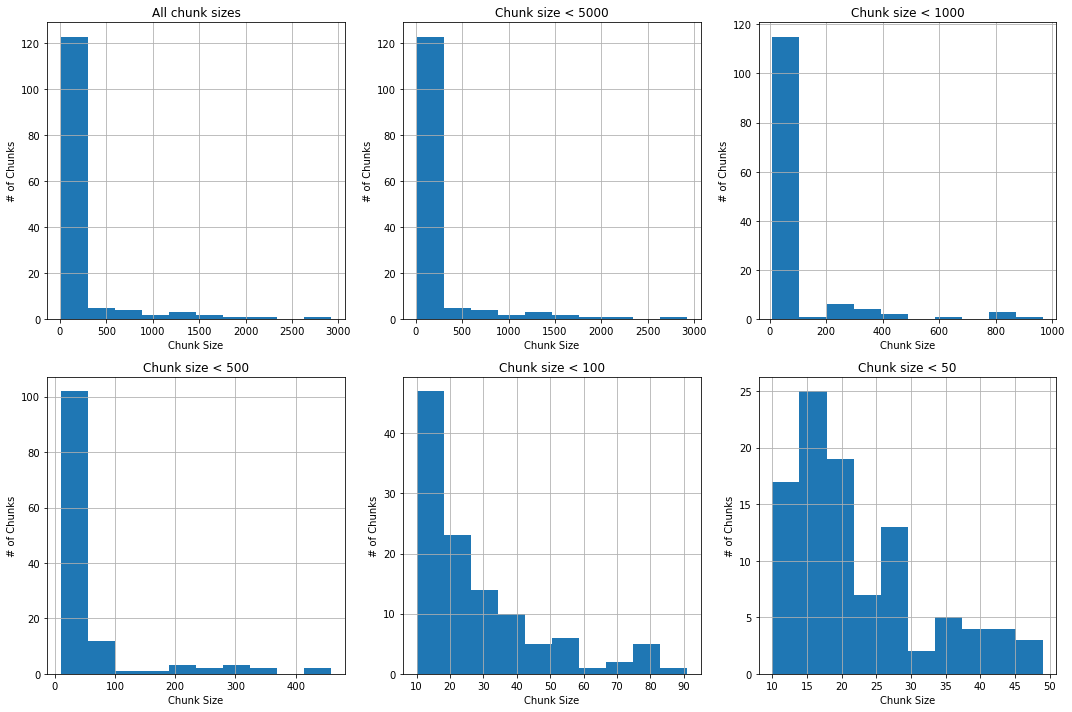

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
violates_partial_order['chunk_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All chunk sizes')

violates_partial_order[violates_partial_order['chunk_size'] < 5000]['chunk_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Chunk size < 5000')

violates_partial_order[violates_partial_order['chunk_size'] < 1000]['chunk_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Chunk size < 1000')

violates_partial_order[violates_partial_order['chunk_size'] < 500]['chunk_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Chunk size < 500')

violates_partial_order[violates_partial_order['chunk_size'] < 100]['chunk_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Chunk size < 100')

violates_partial_order[violates_partial_order['chunk_size'] < 50]['chunk_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Chunk size < 50')
for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Chunk Size")
        ax[i][j].set_ylabel("# of Chunks")
        
fig.tight_layout()

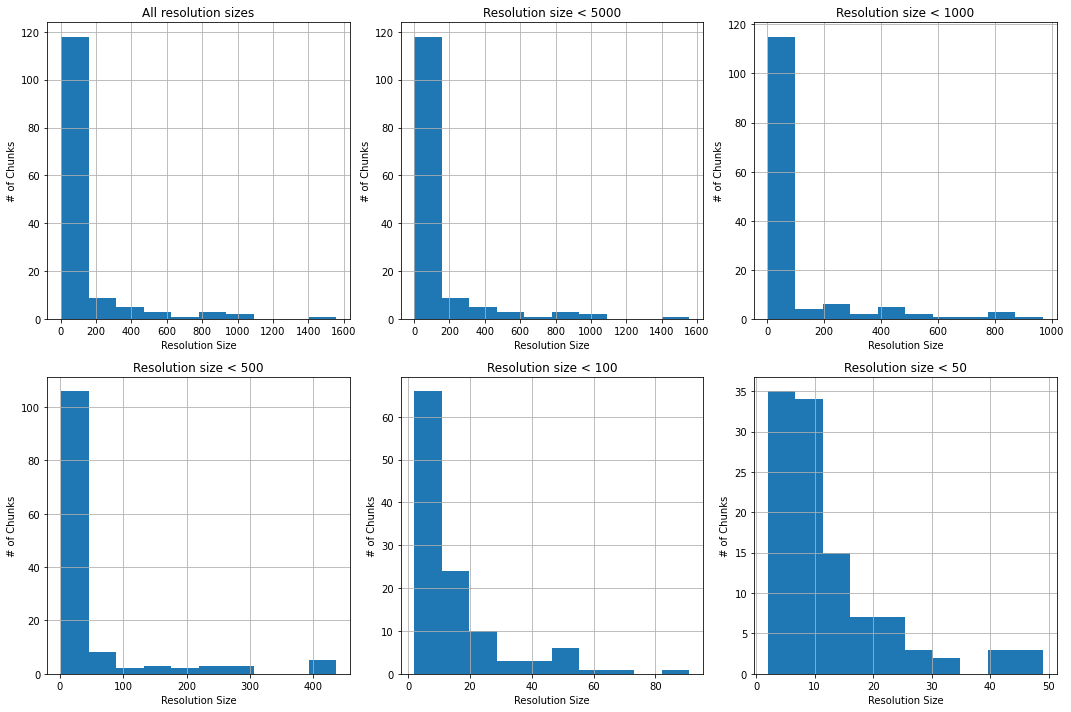

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
violates_partial_order['resolution_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All resolution sizes')

violates_partial_order[violates_partial_order['resolution_size'] < 5000]['resolution_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Resolution size < 5000')

violates_partial_order[violates_partial_order['resolution_size'] < 1000]['resolution_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Resolution size < 1000')

violates_partial_order[violates_partial_order['resolution_size'] < 500]['resolution_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Resolution size < 500')

violates_partial_order[violates_partial_order['resolution_size'] < 100]['resolution_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Resolution size < 100')

violates_partial_order[violates_partial_order['resolution_size'] < 50]['resolution_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Resolution size < 50')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Resolution Size")
        ax[i][j].set_ylabel("# of Chunks")
fig.tight_layout()

### Characteristics of chunks where the resolution does not violate the partial order

In [10]:
does_not_violate[['chunk_size','resolution_size']].describe().round(2)

,chunk_size,resolution_size
count,10584.00,10584.00
mean,19.79,7.08
std,38.50,19.85
min,8.00,1.00
25%,11.00,2.00
50%,13.00,3.00
75%,19.00,7.00
max,1852.00,948.00


<AxesSubplot:>

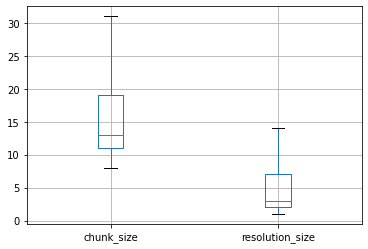

In [11]:
does_not_violate[['chunk_size', 'resolution_size']].boxplot(showfliers=False)

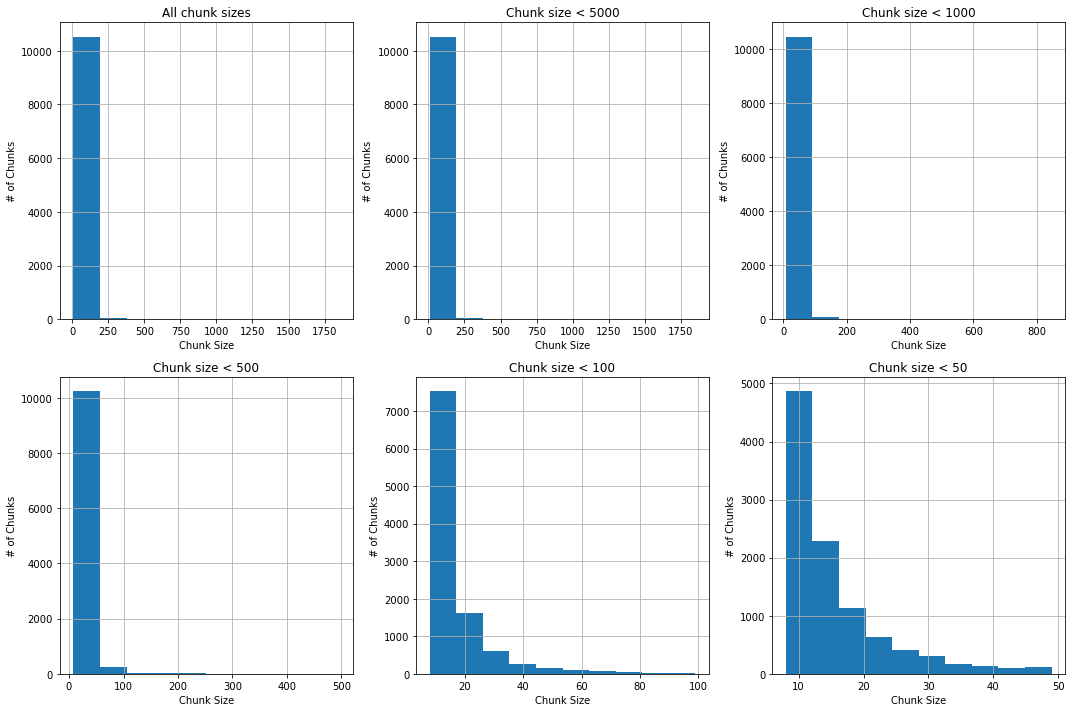

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
does_not_violate['chunk_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All chunk sizes')

does_not_violate[does_not_violate['chunk_size'] < 5000]['chunk_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Chunk size < 5000')

does_not_violate[does_not_violate['chunk_size'] < 1000]['chunk_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Chunk size < 1000')

does_not_violate[does_not_violate['chunk_size'] < 500]['chunk_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Chunk size < 500')

does_not_violate[does_not_violate['chunk_size'] < 100]['chunk_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Chunk size < 100')

does_not_violate[does_not_violate['chunk_size'] < 50]['chunk_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Chunk size < 50')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Chunk Size")
        ax[i][j].set_ylabel("# of Chunks")
fig.tight_layout()

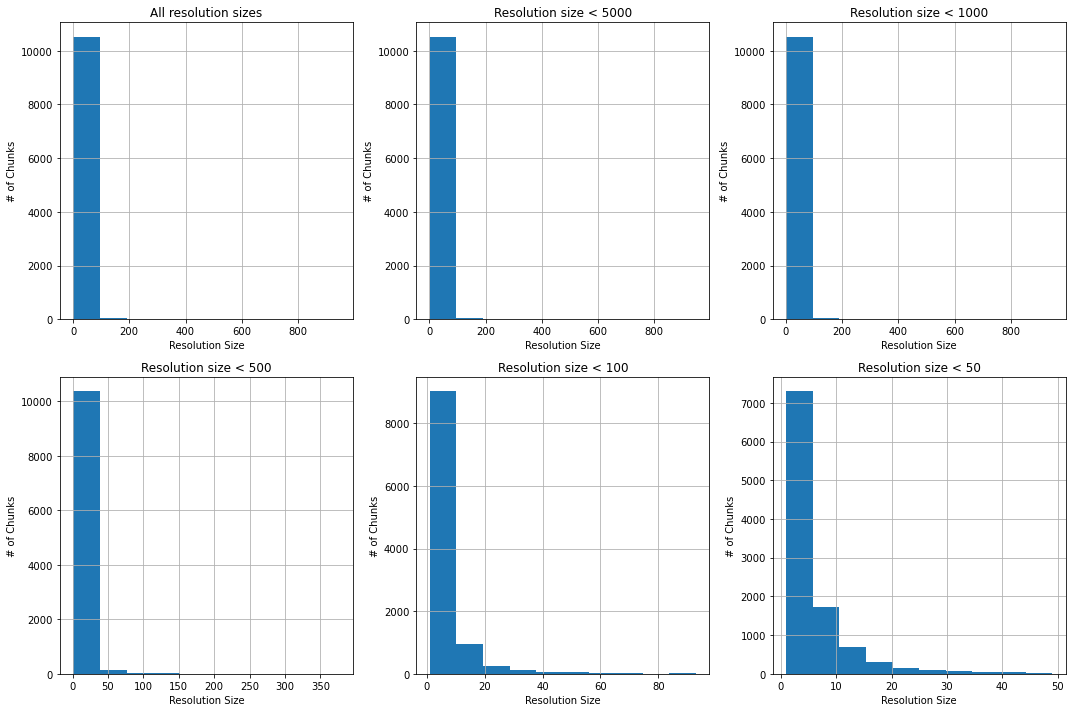

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
does_not_violate['resolution_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All resolution sizes')

does_not_violate[does_not_violate['resolution_size'] < 5000]['resolution_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Resolution size < 5000')

does_not_violate[does_not_violate['resolution_size'] < 1000]['resolution_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Resolution size < 1000')

does_not_violate[does_not_violate['resolution_size'] < 500]['resolution_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Resolution size < 500')

does_not_violate[does_not_violate['resolution_size'] < 100]['resolution_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Resolution size < 100')

does_not_violate[does_not_violate['resolution_size'] < 50]['resolution_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Resolution size < 50')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Resolution Size")
        ax[i][j].set_ylabel("# of Chunks")
fig.tight_layout()

### Random sample of small chunks that violate the partial order

In [14]:
sample = violates_partial_order[violates_partial_order['chunk_size'] <= 15].sample(10, random_state = 42)
sample.head()

,chunk_id,partial_order,chunk_size,resolution_size
12212,1418722,False,14,3
6734,1075768,False,10,3
4827,987576,False,13,6
8840,1156647,False,12,3
4261,976306,False,13,2


#### Chunk 1

In [15]:
chunk1 = Chunk(int(sample.iloc[0]['chunk_id']))

##### Conflicting chunk text

In [16]:
print(chunk1.get_conflict_text())

import org.apache.sshd.server.session.ServerSession;
import org.eclipse.jgit.transport.resolver.ReceivePackFactory;
import org.uberfire.java.nio.fs.jgit.JGitFileSystemProvider;
<<<<<<<
import org.uberfire.java.nio.security.FileSystemAuthorizer;
import org.uberfire.java.nio.security.FileSystemUser;
import org.uberfire.java.nio.security.FileSystemAuthenticator;
import org.uberfire.java.nio.security.AuthorizationManager;
import org.uberfire.java.nio.security.Session;
import org.uberfire.java.nio.security.Subject;
import org.uberfire.java.nio.security.UserPassAuthenticator;
>>>>>>>

public class GitSSHService {





##### Resolution

In [17]:
print(chunk1.resolution)

import org.apache.sshd.server.session.ServerSession;
import org.eclipse.jgit.transport.resolver.ReceivePackFactory;
import org.uberfire.java.nio.fs.jgit.JGitFileSystemProvider;
import org.uberfire.java.nio.security.FileSystemAuthenticator;
import org.uberfire.java.nio.security.FileSystemAuthorizer;
import org.uberfire.java.nio.security.FileSystemUser;

public class GitSSHService {




Order of the imports was changed

#### Chunk 2

In [18]:
chunk2 = Chunk(sample.iloc[1]['chunk_id'])

##### Conflicting chunk text

In [19]:
print(chunk2.get_conflict_text())

import gherkin.formatter.Reporter;
import gherkin.formatter.model.Step;

<<<<<<<
import java.util.*;
import java.util.List;
import java.util.Locale;
>>>>>>>

public interface World {
    void buildBackendWorldsAndRunBeforeHooks(Reporter reporter);




##### Resolution

In [20]:
print(chunk2.resolution)

import gherkin.formatter.Reporter;
import gherkin.formatter.model.Step;
import java.util.Locale;
import java.util.List;


public interface World {
    void buildBackendWorldsAndRunBeforeHooks(Reporter reporter);



The order of the imports was changed in the resolution

##### Chunk 3

In [21]:
chunk3 = Chunk(sample.iloc[2]['chunk_id'])

##### Conflicting chunk text

In [22]:
print(chunk3.get_conflict_text())

 */
package org.qi4j.runtime.query.grammar.impl;

<<<<<<<
import org.qi4j.api.entity.association.Association;
import org.qi4j.api.entity.EntityComposite;
import org.qi4j.api.query.grammar.AssociationReference;
import org.qi4j.runtime.query.QueryException;
import org.qi4j.runtime.entity.EntityInstance;

>>>>>>>
import java.lang.reflect.Method;
import java.lang.reflect.ParameterizedType;
import java.lang.reflect.Type;




##### Resolution

In [23]:
print(chunk3.resolution)

 */
package org.qi4j.runtime.query.grammar.impl;

import org.qi4j.api.entity.EntityComposite;
import org.qi4j.api.entity.association.Association;
import org.qi4j.api.query.grammar.AssociationReference;
import org.qi4j.runtime.entity.EntityInstance;
import org.qi4j.runtime.query.QueryException;

import java.lang.reflect.Method;
import java.lang.reflect.ParameterizedType;
import java.lang.reflect.Type;



Order of the imports was changed in the resolution

##### Chunk 4

In [24]:
chunk4 = Chunk(sample.iloc[3]['chunk_id'])

##### Conflicting chunk text

In [25]:
print(chunk4.get_conflict_text())

import com.yahoo.omid.client.TransactionalTable;
import com.yahoo.omid.examples.Constants;
import com.yahoo.omid.notifications.Interest;
<<<<<<<
import com.yahoo.omid.notifications.client.IncrementalApplication;
import com.yahoo.omid.notifications.client.Observer;
import com.yahoo.omid.notifications.client.DeltaOmid;
import com.yahoo.omid.notifications.client.ObserverBehaviour;
import com.yahoo.omid.notifications.client.OmidDelta;
>>>>>>>

/**
 * This applications shows the basic usage of the Omid's notification framework




##### Resolution

In [26]:
print(chunk4.resolution)

import com.yahoo.omid.client.TransactionalTable;
import com.yahoo.omid.examples.Constants;
import com.yahoo.omid.notifications.Interest;
import com.yahoo.omid.notifications.client.DeltaOmid;
import com.yahoo.omid.notifications.client.IncrementalApplication;
import com.yahoo.omid.notifications.client.Observer;

/**
 * This applications shows the basic usage of the Omid's notification framework



Order of the imports was changed in the resolution

##### Chunk 5

In [27]:
chunk5 = Chunk(sample.iloc[4]['chunk_id'])

##### Conflicting chunk text

In [28]:
print(chunk5.get_conflict_text())

import java.util.Map;
import java.util.Properties;
import java.util.StringTokenizer;
<<<<<<<
import org.hibernate.util.ArrayHelper;
import org.hibernate.util.StringHelper;
import java.util.Iterator;

import org.hibernate.internal.util.collections.ArrayHelper;
import org.hibernate.internal.util.StringHelper;
>>>>>>>

/**
 * Collection of helper methods for dealing with configuration settings.




##### Resolution

In [29]:
print(chunk5.resolution)

import java.util.Map;
import java.util.Properties;
import java.util.StringTokenizer;
import org.hibernate.internal.util.StringHelper;
import org.hibernate.internal.util.collections.ArrayHelper;

/**
 * Collection of helper methods for dealing with configuration settings.



Order of the imports was changed in the resolution

# Characteristics of the chunks where the resolution could not be isolated from the context

In [30]:
imprecise[['chunk_size','resolution_size']].describe().round(2)

,chunk_size,resolution_size
count,2583.00,2583.00
mean,297.87,154.02
std,1145.38,572.47
min,9.00,7.00
25%,17.00,10.00
50%,33.00,19.00
75%,121.00,72.00
max,27116.00,13037.00


<AxesSubplot:>

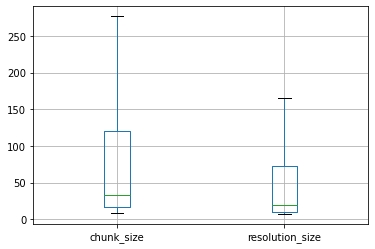

In [31]:
imprecise[['chunk_size', 'resolution_size']].boxplot(showfliers=False)

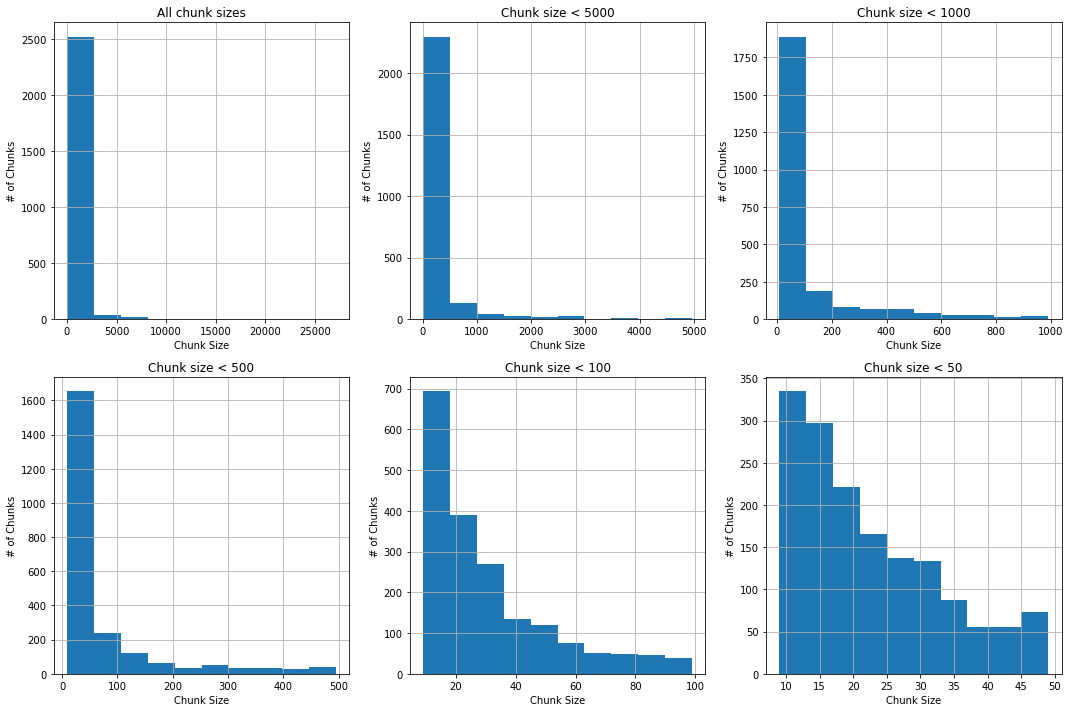

In [32]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
imprecise['chunk_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All chunk sizes')

imprecise[imprecise['chunk_size'] < 5000]['chunk_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Chunk size < 5000')

imprecise[imprecise['chunk_size'] < 1000]['chunk_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Chunk size < 1000')

imprecise[imprecise['chunk_size'] < 500]['chunk_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Chunk size < 500')

imprecise[imprecise['chunk_size'] < 100]['chunk_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Chunk size < 100')

imprecise[imprecise['chunk_size'] < 50]['chunk_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Chunk size < 50')
for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Chunk Size")
        ax[i][j].set_ylabel("# of Chunks")
        
fig.tight_layout()

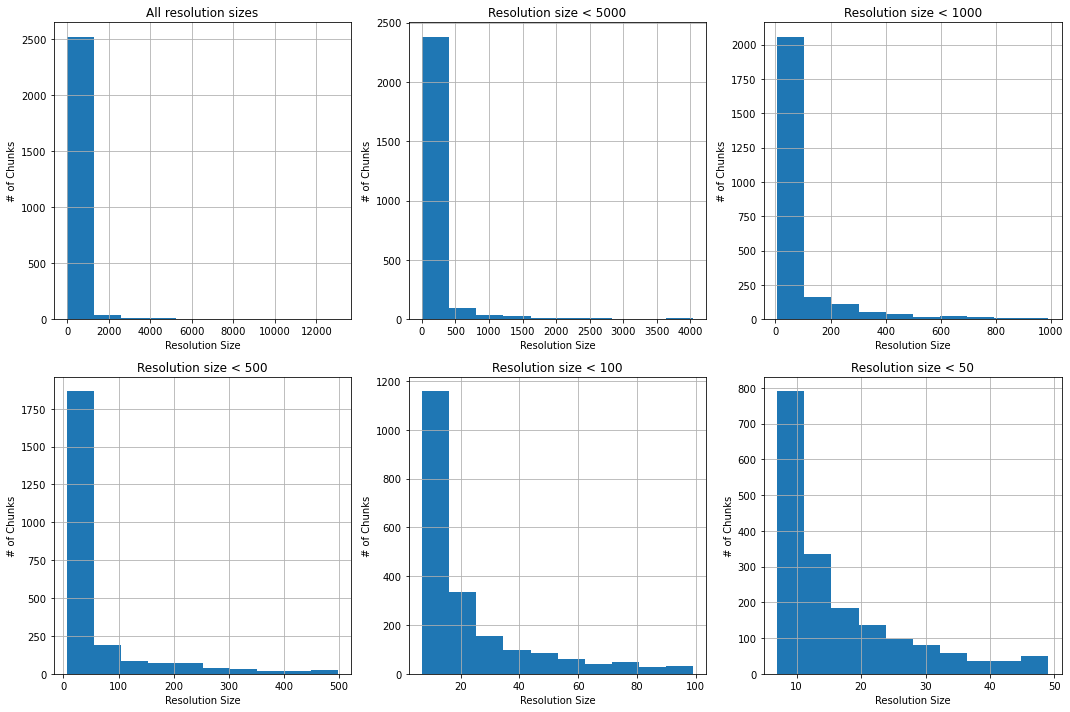

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
imprecise['resolution_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All resolution sizes')

imprecise[imprecise['resolution_size'] < 5000]['resolution_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Resolution size < 5000')

imprecise[imprecise['resolution_size'] < 1000]['resolution_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Resolution size < 1000')

imprecise[imprecise['resolution_size'] < 500]['resolution_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Resolution size < 500')

imprecise[imprecise['resolution_size'] < 100]['resolution_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Resolution size < 100')

imprecise[imprecise['resolution_size'] < 50]['resolution_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Resolution size < 50')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Resolution Size")
        ax[i][j].set_ylabel("# of Chunks")
fig.tight_layout()